 ### Visualizing taxonomic composition in order level
 ---

In [3]:
#setworking directory to AbioticAraMicrobe/
setwd('../')

In [25]:
# load packages
library(vegan)
library(ggplot2)
library(reshape2)
library(cowplot)

---
### Bacterial composition plot

[1] 15

[1] TRUE

Using Samples as id variables



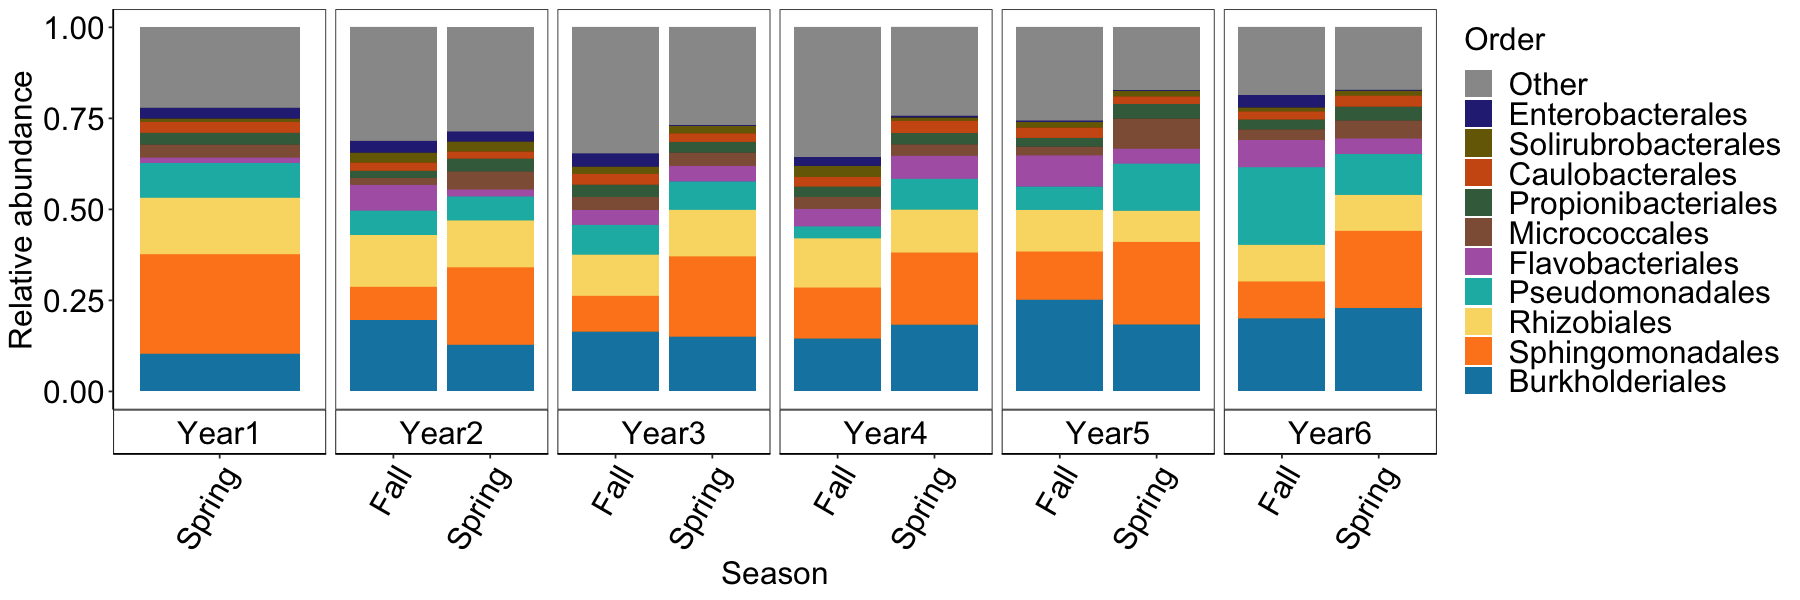

In [20]:
#Bacteria

#open otu and taxa table
Otu1 = read.table("data/DataClean/BV5Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
Taxa = read.table("data/DataClean/BV5Taxa.txt", header = T , check.names = F , stringsAsFactors = F)
Taxa = Taxa[-c(2,3)]

firstotuname = "Otu000002"
n <- which(colnames(Otu1)==firstotuname)
n
sam_otu1 = Otu1[-c(1:n-1)]

#make phyloseq input files
#sample
sample = Otu1[c(1:n-1)]

#add a new column as 'year' which contains samples of one plants generation(Fall last year and spring next year)
#note year 2014 only has spring samples.
sample$Year = as.factor(sample$Year) 
sample$Year = ifelse(sample$TimePoint =="Fall2014"| sample$TimePoint =="Spring2015","Year2", 
                     ifelse(sample$TimePoint =="Fall2015"| sample$TimePoint =="Spring2016","Year3", 
                            ifelse(sample$TimePoint =="Fall2016"| sample$TimePoint =="Spring2017","Year4",
                                   ifelse(sample$TimePoint =="Fall2017"| sample$TimePoint =="Spring2018","Year5",  
                                          ifelse(sample$TimePoint =="Fall2018"| sample$TimePoint =="Spring2019","Year6", "Year1"
                                          )))))

identical(row.names(sample),row.names(sam_otu1)) 
#otu-sample matrix
sam_otuRA <- decostand(sam_otu1, method="total", MARGIN=1)   ###Relative abundance
sam_otuRA$Samples = rownames(sam_otuRA)
#melt
sam_otuRAMelt = melt(sam_otuRA)
colnames(sam_otuRAMelt) = c("sample","OTU","RelativeAbundance")
sam_otuRAMelt1 = merge(x =sam_otuRAMelt , y = Taxa , by.x  = "OTU" , by.y = "OTU")
#Order
agg = aggregate(sam_otuRAMelt1[,3], list(sam_otuRAMelt1$Order), sum) ## sum of relative abundance of different orders in all samples colnames(agg) = c("order1" , "sumAbundance")
colnames(agg) = c("Order1","sumAbundance")
agg$Order2 = agg$Order1  # copy of this col because i want to have main col and change the order of this column to "other" category
agg$Order2 = as.character(agg$Order2)
agg$Order2[agg$sumAbundance < 1.214643e+01] <- "Other"  ##change the order of otus that have less than a threshold to "Other"
data = merge(sam_otuRAMelt1 , agg ,by.x ="Order" , by.y ="Order1")  #add the information of changing orders name to main data frame
data$Order2 <- reorder(data$Order2 , data$sumAbundance)
data1 = merge(x =data , y = sample , by.x  = "sample" , by.y = "Samplenumber")

col = c("#0F85B0","#FD861E","#F9DA73" , "#16B7B2" , "#AF65B2","#905E45","#416B4C","#CE5A17","#776804","#2B2B83","#999999")

plotlist = list()
Ra = "RelativeAbundance"
Order = "Order2"
variable = c("Season")
p1 <- ggplot()  + geom_bar(data=data1, aes_string(x=variable[1], y=Ra, fill = Order), stat="identity", position="fill") +
  facet_wrap(.~ Year, scales = 'free_x' , nrow = 1 , strip.position="bottom")  +
  scale_fill_manual(values=rev(col)) +
  guides(fill=guide_legend(ncol=1))  + 
  theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                     axis.text = element_text(size = 19 , colour = "black" ),
                     axis.title = element_text(size = 19 , colour = "black" ),
                     strip.text = element_text(size = 19 , colour = "black" ),
                     axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                     panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), 
                     axis.line = element_line(colour = "black") ,
                     legend.title = element_text(color = "black", size = 19),
                     legend.text = element_text(color = "black", size = 19) ,
                     strip.background = element_rect(colour = "black", fill = "white")) +
  ylab("Relative abundance") + xlab(variable[1]) + labs(fill = "Order") 
plotlist[[1]] = p1

options(repr.plot.width=15, repr.plot.height=5)
p1


---
### Fungal composition plot

[1] 15

[1] TRUE

Using Samples as id variables



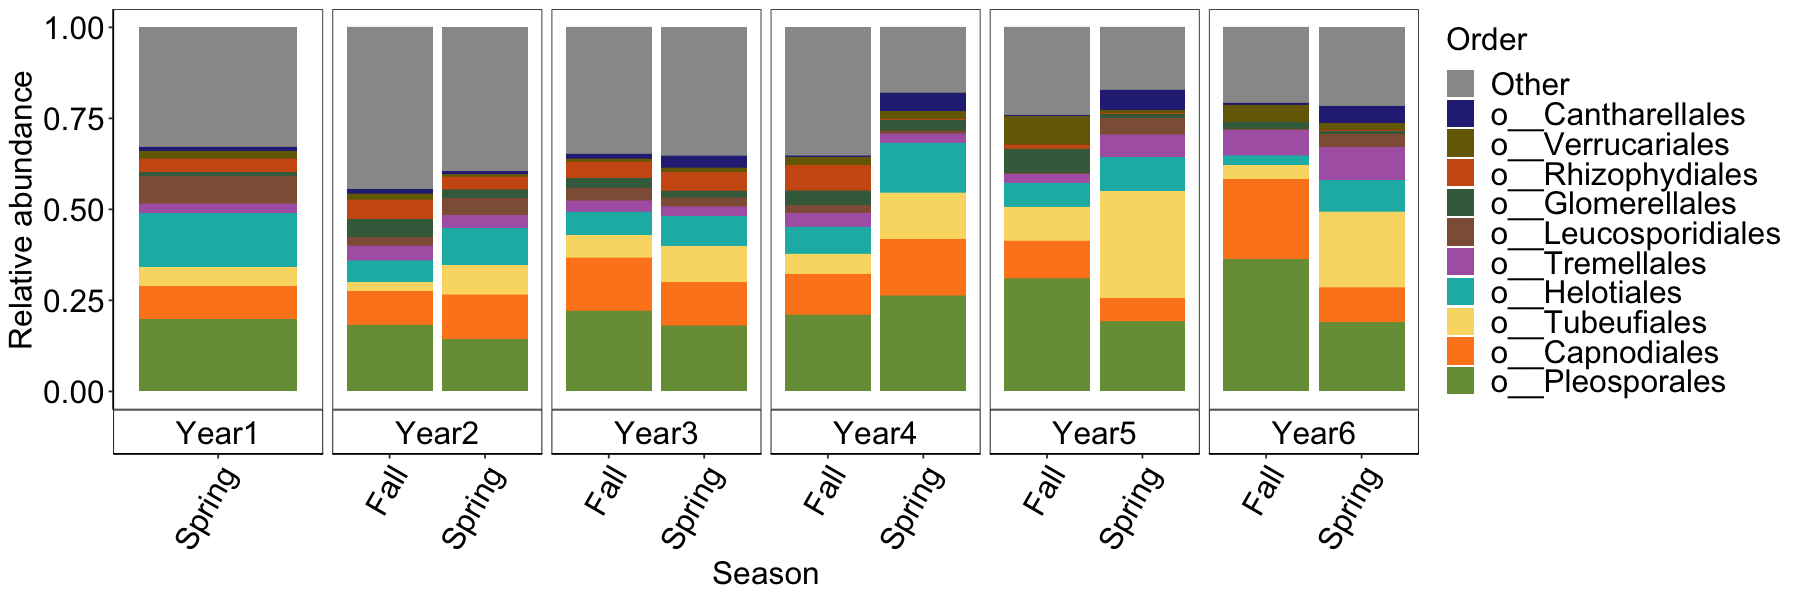

In [22]:
#open otu and taxa table
Otu1 = read.table("data/DataClean/FITS2Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
Taxa = read.table("data/DataClean/FITS2Taxa.txt", header = T , check.names = F , stringsAsFactors = F)
Taxa = Taxa[-c(2,3)]

firstotuname = "Otu00002"
n <- which(colnames(Otu1)==firstotuname)
n
sam_otu1 = Otu1[-c(1:n-1)]

#make phyloseq input files
#sample
sample = Otu1[c(1:n-1)]

#add a new column as 'year' which contains samples of one plants generation(Fall last year and spring next year)
#note year 2014 only has spring samples.

#make phyloseq input files
#sample
sample = Otu1[c(1:n-1)]
sample$Year = as.factor(sample$Year) 
sample$Year = ifelse(sample$TimePoint =="Fall2014"| sample$TimePoint =="Spring2015","Year2", 
                     ifelse(sample$TimePoint =="Fall2015"| sample$TimePoint =="Spring2016","Year3", 
                            ifelse(sample$TimePoint =="Fall2016"| sample$TimePoint =="Spring2017","Year4",
                                   ifelse(sample$TimePoint =="Fall2017"| sample$TimePoint =="Spring2018","Year5",  
                                          ifelse(sample$TimePoint =="Fall2018"| sample$TimePoint =="Spring2019","Year6", "Year1"
                                          )))))
identical(row.names(sample),row.names(sam_otu1)) 
#otu-sample matrix
sam_otuRA <- decostand(sam_otu1, method="total", MARGIN=1)   ###Relative abundance
sam_otuRA$Samples = rownames(sam_otuRA)
#melt
sam_otuRAMelt = melt(sam_otuRA)
colnames(sam_otuRAMelt) = c("sample","OTU","RelativeAbundance")
sam_otuRAMelt1 = merge(x =sam_otuRAMelt , y = Taxa , by.x  = "OTU" , by.y = "OTU")
#Order
agg = aggregate(sam_otuRAMelt1[,3], list(sam_otuRAMelt1$Order), sum) ## sum of relative abundance of different orders in all samples colnames(agg) = c("order1" , "sumAbundance")

colnames(agg) = c("Order1","sumAbundance")
agg$Order2 = agg$Order1  # copy of this col because i want to have main col and change the order of this column to "other" category
#agg$Order2 = as.character(agg$Order2)

agg$Order2[agg$sumAbundance < 1.600236e+01] <- "Other"  ##change the order of otus that have less than a threshold to "Other"
data = merge(sam_otuRAMelt1 , agg ,by.x ="Order" , by.y ="Order1")  #add the information of changing orders name to main data frame
data$Order2 <- reorder(data$Order2 , data$sumAbundance)
data1 = merge(x =data , y = sample , by.x  = "sample" , by.y = "Samplenumber")
data1$InfectionStage = data1$X65.

col = c("#789B44","#FD861E","#F9DA73" , "#16B7B2" , "#AF65B2","#905E45","#416B4C","#CE5A17","#776804","#2B2B83","#999999")

#plotlist = list()
Ra = "RelativeAbundance"
Order = "Order2"
variable = c("Season")
p2 <- ggplot()  + geom_bar(data=data1, aes_string(x=variable[1], y=Ra, fill = Order), stat="identity", position="fill") +
  facet_wrap(.~ Year, scales = 'free_x' , nrow = 1 , strip.position="bottom")  +
  scale_fill_manual(values=rev(col)) +
  guides(fill=guide_legend(ncol=1))  + 
  theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                     axis.text = element_text(size = 19 , colour = "black" ),
                     axis.title = element_text(size = 19 , colour = "black" ),
                     strip.text = element_text(size = 19 , colour = "black" ),
                     axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                     panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), 
                     axis.line = element_line(colour = "black") ,
                     legend.title = element_text(color = "black", size = 19),
                     legend.text = element_text(color = "black", size = 19) ,
                     strip.background = element_rect(colour = "black", fill = "white")) +
  ylab("Relative abundance") + xlab(variable[1]) + labs(fill = "Order") 
plotlist[[2]] = p2

options(repr.plot.width=15, repr.plot.height=5)
p2

---
### Eukaryotes composition plot

[1] 15

[1] TRUE

Using Samples as id variables



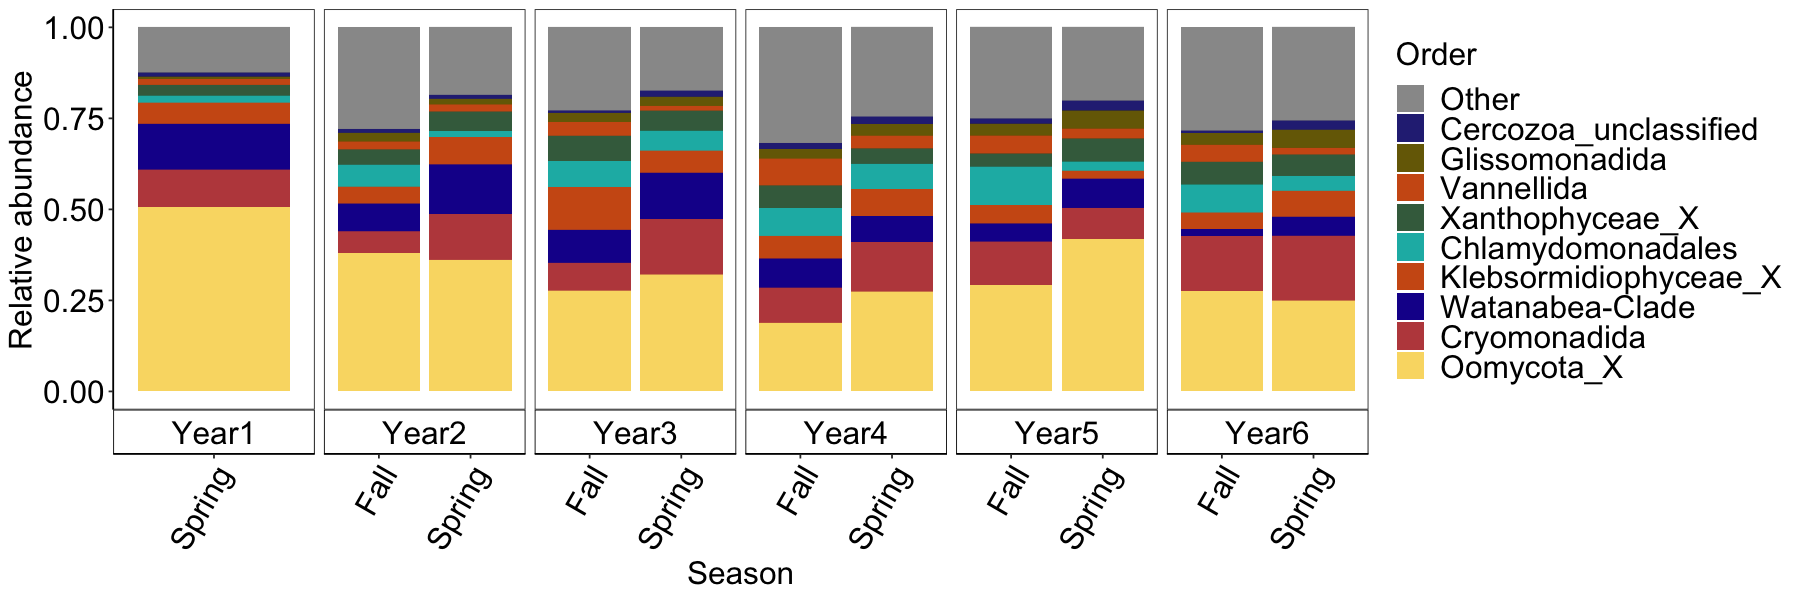

In [24]:
#open otu and taxa table
Otu1 = read.table("data/DataClean/PV9Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
Taxa = read.table("data/DataClean/PV9Taxa.txt", header = T , check.names = F , stringsAsFactors = F)
Taxa = Taxa[-c(2,3)]

firstotuname = "Otu00002"
n <- which(colnames(Otu1)==firstotuname)
n
sam_otu1 = Otu1[-c(1:n-1)]

#make phyloseq input files
#sample
sample = Otu1[c(1:n-1)]

#add a new column as 'year' which contains samples of one plants generation(Fall last year and spring next year)
#note year 2014 only has spring samples.
sample$Year = as.factor(sample$Year) 
sample$Year = ifelse(sample$TimePoint =="Fall2014"| sample$TimePoint =="Spring2015","Year2", 
                     ifelse(sample$TimePoint =="Fall2015"| sample$TimePoint =="Spring2016","Year3", 
                            ifelse(sample$TimePoint =="Fall2016"| sample$TimePoint =="Spring2017","Year4",
                                   ifelse(sample$TimePoint =="Fall2017"| sample$TimePoint =="Spring2018","Year5",  
                                          ifelse(sample$TimePoint =="Fall2018"| sample$TimePoint =="Spring2019","Year6", "Year1"
                                          )))))
#sample = sampleinfo[match(row.names(sam_otu1), row.names(sampleinfo)), ]
identical(row.names(sample),row.names(sam_otu1)) 
#otu-sample matrix
sam_otuRA <- decostand(sam_otu1, method="total", MARGIN=1)   ###Relative abundance
sam_otuRA$Samples = rownames(sam_otuRA)
#melt
sam_otuRAMelt = melt(sam_otuRA)
colnames(sam_otuRAMelt) = c("sample","OTU","RelativeAbundance")
sam_otuRAMelt1 = merge(x =sam_otuRAMelt , y = Taxa , by.x  = "OTU" , by.y = "OTU")
#Order
agg = aggregate(sam_otuRAMelt1[,3], list(sam_otuRAMelt1$Order), sum) ## sum of relative abundance of different orders in all samples colnames(agg) = c("order1" , "sumAbundance")
colnames(agg) = c("Order1","sumAbundance")
agg$Order2 = agg$Order1  # copy of this col because i want to have main col and change the order of this column to "other" category
agg$Order2 = as.character(agg$Order2)
agg$Order2[agg$sumAbundance <= 1.055062e+01] <- "Other"  ##change the order of otus that have less than a threshold to "Other"
data = merge(sam_otuRAMelt1 , agg ,by.x ="Order" , by.y ="Order1")  #add the information of changing orders name to main data frame
data$Order2 <- reorder(data$Order2 , data$sumAbundance)
data1 = merge(x =data , y = sample , by.x  = "sample" , by.y = "Samplenumber")
data1$InfectionStage = data1$X65.

#col = c("#789B44","#FD861E","#F9DA73" , "#16B7B2" , "#AF65B2","#905E45","#416B4C","#CE5A17","#776804","#2B2B83","#999999")
col = c("#8C8CE9","#F9DA73" ,"#BD4B4B" ,"#1A0099","#CE5A17","#16B7B2","#416B4C","#CE5A17","#776804","#2B2B83","#999999") 
#plotlist = list()
Ra = "RelativeAbundance"
Order = "Order2"
variable = c("Season")
p3 <- ggplot()  + geom_bar(data=data1, aes_string(x=variable[1], y=Ra, fill = Order), stat="identity", position="fill") +
  facet_wrap(.~ Year, scales = 'free_x' , nrow = 1 , strip.position="bottom")  +
  scale_fill_manual(values=rev(col)) +
  guides(fill=guide_legend(ncol=1))  + 
  theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                     axis.text = element_text(size = 19 , colour = "black" ),
                     axis.title = element_text(size = 19 , colour = "black" ),
                     strip.text = element_text(size = 19 , colour = "black" ),
                     axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                     panel.grid.major = element_blank(),
                     panel.grid.minor = element_blank(), 
                     axis.line = element_line(colour = "black") ,
                     legend.title = element_text(color = "black", size = 19),
                     legend.text = element_text(color = "black", size = 19) ,
                     strip.background = element_rect(colour = "black", fill = "white")) +
  ylab("Relative abundance") + xlab(variable[1]) + labs(fill = "Order") 
plotlist[[3]] = p3

options(repr.plot.width=15, repr.plot.height=5)
p3

In [27]:
#save the plots
options(repr.plot.width=15, repr.plot.height=15)

ggsave("plots/composition_barplot.pdf" , plot_grid(plotlist = plotlist[c(1:3)] , nrow = 3 , ncol = 1), width = 14 ,
       height = 15 ,  dpi = 150,
       compress = TRUE)
